# Import Packages

In [1]:
import sys
import os
import glob
import xarray as xr
import numpy as np


from spectral_analysis_functions import *
from surface_simulation_functions import *

# --- plotting and interactive stuff ----------------------
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

cNorm = mcolors.Normalize(vmin=0, vmax=2)
jet = plt.get_cmap('jet')
mpl.rcParams.update({'figure.figsize':[10,6],'axes.grid' : True,'font.size': 14,'savefig.facecolor':'white'})

cmap0 = 'viridis'

## Read spectrum

In [4]:
DS = xr.open_dataset('../DATA/Spectrum_L2S_ind9_35.nc')
Hs_9 = DS['Hs_ind_9_box'].compute().data
Hs_9_L2S = DS['Hs_ind_9_L2S'].compute().data
Hs_35 = DS['Hs_ind_35_box'].compute().data
Hs_35_L2S = DS['Hs_ind_35_L2S'].compute().data
# Use factor to check different wave heights ... 
Hsfac=1
print('ind 1: 9, Hs=',Hs_9,'m')
print('ind 2: 35, Hs=',Hs_35,'m')



ind 1: 9, Hs= 9.315999984741211 m
ind 2: 35, Hs= 9.303999900817871 m


## Generate or load sea surface (geometry only)

In [7]:
iscompute = 1
#th_vec = DS['phi_vector_L2S_ind_9'].compute().data
Hs=Hs_35;Hs_L2S=Hs_35_L2S;Efth = DS['Spec_L2S_ind_35_1Sided'].compute().data*Hs**2/Hs_L2S**2*Hsfac**2
th_vec = DS['phi_vector_L2S_ind_35'].compute().data
f_vec = DS['k_vector'].compute().data
nx = 2**12
ny = nx
dx=14
dy=14
ns=10
ntiles=7
stdH=np.zeros((ns,ntiles))
steH=np.zeros((ns,ntiles))
LL=np.zeros((ns,ntiles))
for seed in range(ns):
   print('seed:',seed)
       
   S_r,S_i,Xa,Ya,rg,kX2,kY2,Ekxky,dkx2,dky2,Hskk,Qkk=surface_from_Efth(Efth,f_vec,f_vec*0,th_vec,0.,
                                                               seed=seed,nx=nx,
                                                               ny=ny,dx=dx,dy=dy,iswvnb=1)
   # uncomment this if you want to see what a surface looks like
   #fig,ax=plt.subplots(figsize=(6,6))
   #im=ax.pcolormesh(Xa/1000.,Ya/1000.,S_r,cmap='seismic')
   #_=ax.set_ylim((15,35))
   #_=ax.set_xlim((15,35))
   #print('Surface:',4*np.sqrt(np.var(S_r.flatten())),Qkk) 


   B = np.sqrt(S_r**2+S_i**2)
   nx = len(Xa)
   ny = len(Ya)
   Xa_cent = Xa - 0.5*Xa.max()
   Ya_cent = Ya - 0.5*Ya.max()

   for nti in range(ntiles): 
       nt=2**(nti+1)
       print('num tiles:',nt)
       L=dx*nx/nt
       LL[seed,nti]=L
       Eta,Eta_all,kx2,ky2,dkxtile,dkytile=FFT2D_one_array(S_r,dx,dy,n=nt,isplot=0)
       Hall=np.sqrt(np.sum(Eta_all,axis=(0, 1)))
       stdH[seed,nti]=np.std(Hall)/np.mean(Hall)
       steH[seed,nti]=np.pi*np.sqrt(2)*Qkk/L
       
       print('stdH:',Qkk,stdH[seed,nti],steH[seed,nti],', L=',L,nx)


Hs=Hs_9;Hs_L2S=Hs_9_L2S;Efth = DS['Spec_L2S_ind_9_1Sided'].compute().data*Hs**2/Hs_L2S**2*Hsfac**2
th_vec = DS['phi_vector_L2S_ind_9'].compute().data


stfH=np.zeros((ns,ntiles))
stgH=np.zeros((ns,ntiles))
LL=np.zeros((ns,ntiles))
for seed in range(ns):
   print('seed:',seed)
       
   S_r,S_i,Xa,Ya,rg,kX2,kY2,Ekxky,dkx2,dky2,Hskk,Qkk=surface_from_Efth(Efth,f_vec,f_vec*0,th_vec,0.,
                                                               seed=seed,nx=nx,
                                                               ny=ny,dx=dx,dy=dy,iswvnb=1)
   # uncomment this if you want to see what a surface looks like
   #fig,ax=plt.subplots(figsize=(6,6))
   #im=ax.pcolormesh(Xa/1000.,Ya/1000.,S_r,cmap='seismic')
   #_=ax.set_ylim((15,35))
   #_=ax.set_xlim((15,35))
   #print('Surface:',4*np.sqrt(np.var(S_r.flatten())),Qkk) 


   B = np.sqrt(S_r**2+S_i**2)
   nx = len(Xa)
   ny = len(Ya)
   Xa_cent = Xa - 0.5*Xa.max()
   Ya_cent = Ya - 0.5*Ya.max()

   for nti in range(ntiles): 
       nt=2**(nti+1)
       print('num tiles:',nt)
       L=dx*nx/nt
       LL[seed,nti]=L
       Eta,Eta_all,kx2,ky2,dkxtile,dkytile=FFT2D_one_array(S_r,dx,dy,n=nt,isplot=0)
       Hall=np.sqrt(np.sum(Eta_all,axis=(0, 1)))
       stfH[seed,nti]=np.std(Hall)/np.mean(Hall)
       stgH[seed,nti]=np.pi*np.sqrt(2)*Qkk/L
       
       print('stdH:',Qkk,stfH[seed,nti],stgH[seed,nti],', L=',L,nx)


seed: 0
num tiles: 2
stdH: 42.87456154922617 0.009572344405323825 0.006643647390767219 , L= 28672.0 4096
num tiles: 4
stdH: 42.87456154922617 0.014525072330377737 0.013287294781534438 , L= 14336.0 4096
num tiles: 8
stdH: 42.87456154922617 0.02521954057757292 0.026574589563068875 , L= 7168.0 4096
num tiles: 16
stdH: 42.87456154922617 0.050848692281494835 0.05314917912613775 , L= 3584.0 4096
num tiles: 32
stdH: 42.87456154922617 0.09051614205537 0.1062983582522755 , L= 1792.0 4096
num tiles: 64
stdH: 42.87456154922617 0.1541116657748275 0.212596716504551 , L= 896.0 4096
num tiles: 128
stdH: 42.87456154922617 0.24331516845367054 0.425193433009102 , L= 448.0 4096
seed: 1
num tiles: 2
stdH: 42.87456154922617 0.010696163058041254 0.006643647390767219 , L= 28672.0 4096
num tiles: 4
stdH: 42.87456154922617 0.019438830289049486 0.013287294781534438 , L= 14336.0 4096
num tiles: 8
stdH: 42.87456154922617 0.03033080451417823 0.026574589563068875 , L= 7168.0 4096
num tiles: 16
stdH: 42.874561549226

15.014214551228825


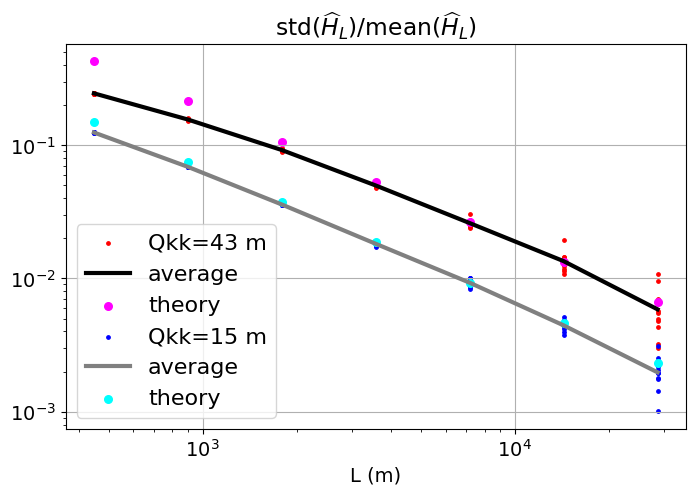

In [6]:
small=6
print(Qkk)
fig,ax1=plt.subplots(1,1,figsize=(8,5))
vecHs=np.linspace(1,12,23)
ax1.scatter(LL,stdH[:,:],c='red',s=small,label='Qkk=43 m');
ax1.plot(LL[0,:],np.mean(stdH[:,:],axis=0),c='black',linewidth=3,linestyle='solid',label=r'average');
ax1.scatter(LL[0,:],steH[0,:],c='magenta',s=30,label=r'theory');
ax1.scatter(LL,stfH[:,:],c='blue',s=small,label='Qkk=15 m');
ax1.plot(LL[0,:],np.mean(stfH[:,:],axis=0),c='grey',linewidth=3,linestyle='solid',label=r'average');
ax1.scatter(LL[0,:],stgH[0,:],c='cyan',s=30,label=r'theory');
#ax1.scatter(bigtab[:,0,0,0],bigtab[:,5,1,1]**2-bigtab[:,5,1,0]**2,c='red',s=small,label='LS');
#ax1.scatter(bigtab[:,0,0,0],bigtab[:,5,0,1]**2-bigtab[:,5,0,0]**2,c='blue',s=small,label='ML');
#ax1.plot(vecHs,vecHs**0/700+vecHs**1/600,c='black',linewidth=3,linestyle='dashed',label='ML');
ax1.set_xlabel('L (m)')
ax1.set_xscale('log')  
ax1.set_yscale('log')  
ax1.set_title(r'std($\widehat{H}_L$)/mean($\widehat{H}_L$)')
leg = ax1.legend(loc='lower left', fontsize=16)
fig.savefig('std_maps.pdf')